## Ford GoBike-share Data Exploration
## Zainab Mohammed

## Introduction
This data consist of information about a bike-sharing system covering San Francisco Bay area for a month. This program is a shared transport service where bicycles are available for shared use.
It includes information about members of this program which includes duration of their trips,age,gender,bike_id.
The dataset can be found [here](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems)




## Preliminary Wrangling


In [47]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
%matplotlib inline

In [48]:
#read data into Dataframe
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [49]:
#inspect the last few rows
df.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [50]:
#inspect a random sample of data
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
99271,1052,2019-02-14 20:24:19.4600,2019-02-14 20:41:51.8960,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,58.0,Market St at 10th St,37.776619,-122.417385,6530,Subscriber,1993.0,Male,No
40512,504,2019-02-22 20:31:52.4630,2019-02-22 20:40:16.4890,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1547,Subscriber,1979.0,Male,No
29043,548,2019-02-25 07:58:17.8390,2019-02-25 08:07:26.0320,115.0,Jackson Playground,37.765026,-122.398773,81.0,Berry St at 4th St,37.775880,-122.393170,2722,Subscriber,1966.0,Female,No
4280,1586,2019-02-28 15:51:40.1080,2019-02-28 16:18:06.5600,144.0,Precita Park,37.747300,-122.411403,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,5296,Subscriber,1994.0,Male,No
113913,731,2019-02-12 10:27:37.3000,2019-02-12 10:39:48.7970,58.0,Market St at 10th St,37.776619,-122.417385,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,5442,Subscriber,1984.0,Male,No


In [51]:
#summary statistics of data

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [52]:
# check for duplicates

df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [54]:
#number of unique bikes in the dataset

df['bike_id'].nunique()

4646

In [55]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [56]:
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [57]:
# Make a copy of original dataset for wrangling
bike_df = df.copy()

### Convert data types

In [58]:
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])
bike_df['bike_id'] = bike_df['bike_id'].astype(str)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [59]:
# convert seconds to minutes in the duration_sec column

bike_df['duration_mins'] = (bike_df['duration_sec']/60).astype(int)


#Extract hour for bike rides from start_time and end_time column

bike_df['start_hour'] = bike_df['start_time'].dt.hour
bike_df['end_hour'] = bike_df['end_time'].dt.hour

In [60]:
# Extract day of the week from start_time and end_time columns

bike_df['start_day'] = bike_df['start_time'].dt.strftime('%A')
bike_df['end_day'] = bike_df['end_time'].dt.strftime('%A')

bike_df['start_date'] = pd.to_datetime(bike_df['start_time'].dt.strftime('%Y-%m-%d'))
bike_df['end_date'] = pd.to_datetime(bike_df['start_time'].dt.strftime('%Y-%m-%d'))


bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,start_hour,end_hour,start_day,end_day,start_date,end_date
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869,17,8,Thursday,Friday,2019-02-28,2019-02-28
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,708,18,6,Thursday,Friday,2019-02-28,2019-02-28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1030,12,5,Thursday,Friday,2019-02-28,2019-02-28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608,17,4,Thursday,Friday,2019-02-28,2019-02-28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26,23,0,Thursday,Friday,2019-02-28,2019-02-28


In [61]:
#drop empty rows to be able to convert the member_birth_year column

bike_df.dropna(inplace = True)

In [62]:
# Extract the ages of members from member_birth_year column.
# Since their birth year was recorded in 2019,we will use that as reference

bike_df['member_age'] = 2019 - bike_df['member_birth_year'].astype(int)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [63]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_mins,start_hour,end_hour,start_day,end_day,start_date,end_date,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,869,17,8,Thursday,Friday,2019-02-28,2019-02-28,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,1030,12,5,Thursday,Friday,2019-02-28,2019-02-28,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,608,17,4,Thursday,Friday,2019-02-28,2019-02-28,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,26,23,0,Thursday,Friday,2019-02-28,2019-02-28,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,29,23,0,Thursday,Friday,2019-02-28,2019-02-28,60


In [64]:
#drop columns not necessary for analysis
drop_columns = ['duration_sec','end_time','start_station_longitude','start_station_latitude','start_station_id','end_station_id',
          'end_station_longitude','end_station_latitude','member_birth_year','start_time']
bike_df.drop(drop_columns,axis = 1, inplace = True)

In [65]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_name       174952 non-null  object        
 1   end_station_name         174952 non-null  object        
 2   bike_id                  174952 non-null  object        
 3   user_type                174952 non-null  object        
 4   member_gender            174952 non-null  object        
 5   bike_share_for_all_trip  174952 non-null  object        
 6   duration_mins            174952 non-null  int32         
 7   start_hour               174952 non-null  int64         
 8   end_hour                 174952 non-null  int64         
 9   start_day                174952 non-null  object        
 10  end_day                  174952 non-null  object        
 11  start_date               174952 non-null  datetime64[ns]
 12  end_date        

In [66]:
bike_df.head()

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_mins,start_hour,end_hour,start_day,end_day,start_date,end_date,member_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,869,17,8,Thursday,Friday,2019-02-28,2019-02-28,35
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030,12,5,Thursday,Friday,2019-02-28,2019-02-28,47
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,608,17,4,Thursday,Friday,2019-02-28,2019-02-28,30
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26,23,0,Thursday,Friday,2019-02-28,2019-02-28,45
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,29,23,0,Thursday,Friday,2019-02-28,2019-02-28,60


In [67]:
bike_df.describe()

,duration_mins,start_hour,end_hour,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.241461,13.456165,13.609533,34.196865
std,27.371269,4.734282,4.748029,10.118731
min,1.000000,0.000000,0.000000,18.000000
25%,5.000000,9.000000,9.000000,27.000000
50%,8.000000,14.000000,14.000000,32.000000
75%,13.000000,17.000000,18.000000,39.000000
max,1409.000000,23.000000,23.000000,141.000000


In [68]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_name       174952 non-null  object        
 1   end_station_name         174952 non-null  object        
 2   bike_id                  174952 non-null  object        
 3   user_type                174952 non-null  object        
 4   member_gender            174952 non-null  object        
 5   bike_share_for_all_trip  174952 non-null  object        
 6   duration_mins            174952 non-null  int32         
 7   start_hour               174952 non-null  int64         
 8   end_hour                 174952 non-null  int64         
 9   start_day                174952 non-null  object        
 10  end_day                  174952 non-null  object        
 11  start_date               174952 non-null  datetime64[ns]
 12  end_date        

### Summary of Data Wrangling


 There are 174952 observations and 14 features. Four variables(duration_mins, member_age,start_hour and end_hour) are numeric. Date variables are start_date and end_date whiles the rest of the variables are strings

#### Features of Interest
I am interested in investigating factors that characterize members of bike_share and relationship between them. Feautures like user_type,bike_share_for_all_trips will be of keen interest.
I will explore how members contribute to the bike-share system:
The distribution of ages of members.
What group of  members there is and how they differ
Average trip duration among these group etc


I suggest features like member_age, member_gender and duration_mins,start_hour,start_day will support my investigations.

## Univariate Exploration

#### Distribution  of ages.
This histogram will show distribution of ages of members. We will know where most of the ages fall.


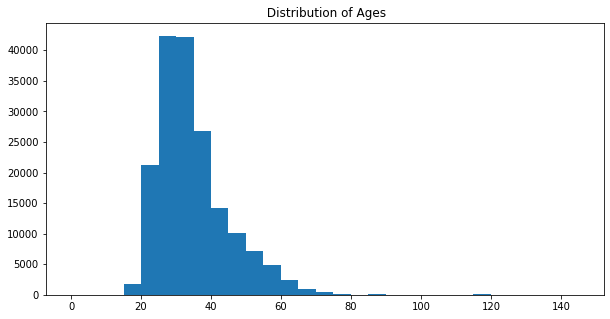

In [69]:
#distribution of age
plt.figure(figsize = (10,5))
bins = np.arange(0,bike_df['member_age'].max() + 5,5)
plt.hist(data = bike_df,x = 'member_age', bins = bins)
plt.title(' Distribution of Ages');

This column is highly skewed to the right with most ages falling  between 25 and 35. We have some extreme ages as well.We will explore this further with a box plot below

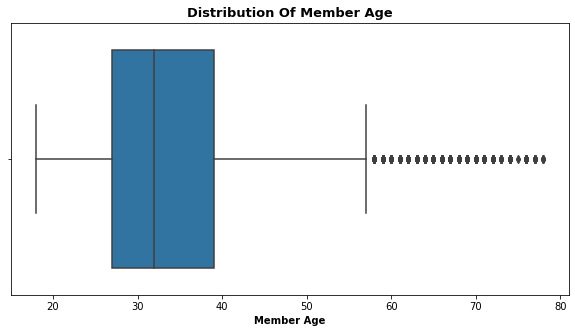

In [104]:

def univariate_boxplots(data,feature):
    """"
    This creates univariate boxplots for my investigation.
    """
    plt.figure(figsize = (10,5))
    plot = sns.boxplot(data = data, x = feature)
    feature  = feature.replace('_',' ')
    plt.title(f'Distribution of {feature}'.title(),fontsize = 13,weight = 'bold')
    plt.xlabel(feature.title(),fontsize = 10,weight = 'bold')
    plt.ylabel(''.title(),fontsize = 10,weight = 'bold')
    return plot

    
univariate_boxplots(bike_df, 'member_age');


The median age is around 35 with outliers that go to 141 years.                                                 
For my analysis I will filter out observations with ages above 80 years  due to inconsistency


In [71]:
#select observations with ages less than 80
bike_df  = bike_df[bike_df['member_age'] < 80]
bike_df.head()

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_mins,start_hour,end_hour,start_day,end_day,start_date,end_date,member_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,869,17,8,Thursday,Friday,2019-02-28,2019-02-28,35
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030,12,5,Thursday,Friday,2019-02-28,2019-02-28,47
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,608,17,4,Thursday,Friday,2019-02-28,2019-02-28,30
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26,23,0,Thursday,Friday,2019-02-28,2019-02-28,45
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,29,23,0,Thursday,Friday,2019-02-28,2019-02-28,60


In [72]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_name       174749 non-null  object        
 1   end_station_name         174749 non-null  object        
 2   bike_id                  174749 non-null  object        
 3   user_type                174749 non-null  object        
 4   member_gender            174749 non-null  object        
 5   bike_share_for_all_trip  174749 non-null  object        
 6   duration_mins            174749 non-null  int32         
 7   start_hour               174749 non-null  int64         
 8   end_hour                 174749 non-null  int64         
 9   start_day                174749 non-null  object        
 10  end_day                  174749 non-null  object        
 11  start_date               174749 non-null  datetime64[ns]
 12  end_date        

In [73]:
print(bike_df.shape)
bike_df.describe()

(174749, 14)


,duration_mins,start_hour,end_hour,member_age
count,174749.000000,174749.000000,174749.000000,174749.000000
mean,11.246399,13.456106,13.609537,34.122335
std,27.385793,4.735567,4.749321,9.871342
min,1.000000,0.000000,0.000000,18.000000
25%,5.000000,9.000000,9.000000,27.000000
50%,8.000000,14.000000,14.000000,32.000000
75%,13.000000,17.000000,18.000000,39.000000
max,1409.000000,23.000000,23.000000,78.000000


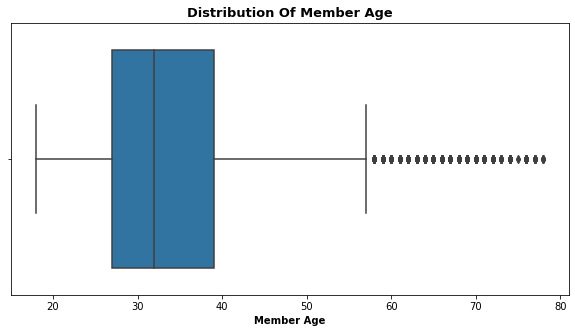

In [105]:
#let's examine the distribution of ages again 
univariate_boxplots(bike_df, 'member_age');

After limiting ages to below 80,our maximum age is 78.The median age has dropped a little from about 35 to 33

In [75]:
bike_df.to_csv("cleaned_bike_df.csv")

#### Distribution of trip duration
This will help us know the range where the most occuring trip duration fall.How many minutes do members' trip usually last.

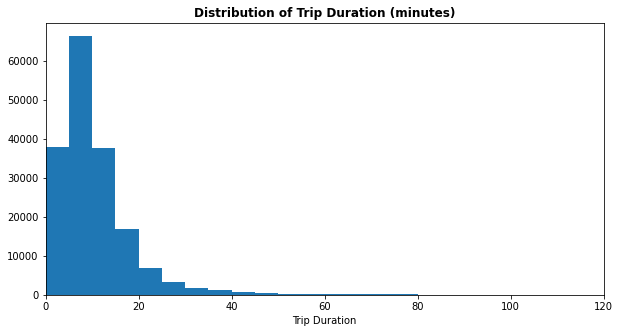

In [76]:
#distribution of duration of bike rides
plt.figure(figsize = (10,5))
bins = np.arange(0,bike_df['duration_mins'].max()+5, 5)
plt.xlim(0,120)
plt.hist(data = bike_df, x = 'duration_mins', bins = bins)
plt.xlabel ('Trip Duration')
plt.title('Distribution of Trip Duration (minutes)',weight = 'bold');

It seems most are short trips between 5 and 10 minutes although some members also do pretty longer trips.

#### Count of Members per Gender
How many members are females, males or 'other' gender

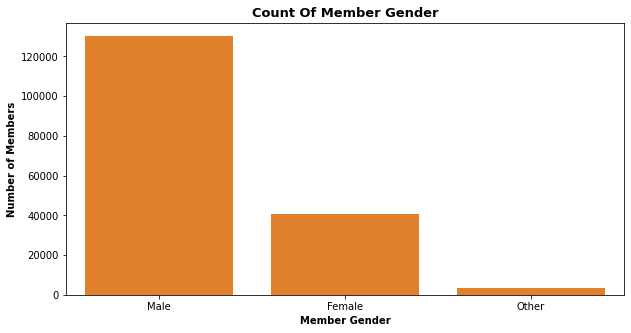

In [77]:
def unicountplot(data,feature,order):
    plt.figure(figsize = (10,5))
    plot = sns.countplot(data = data, x = feature,order =  order, color = sns.color_palette()[1])
    feature  = feature.replace('_',' ')
    plt.title(f'Count of {feature}'.title(),fontsize = 13,weight = 'bold')
    plt.xlabel(feature.title(),fontsize = 10,weight = 'bold')
    plt.ylabel(''.title(),fontsize = 10,weight = 'bold')
    return plot
unicountplot(bike_df,'member_gender',bike_df['member_gender'].value_counts().index);
plt.ylabel('Number of Members',fontsize = 10,weight = 'bold');
    

Members of this bike share are mostly males.Their numbers are more than twice the Females.

#### Most frequently used bike
This graph  will help us know the most used bike using the bike_id. Could there be any favorite bike for the members?

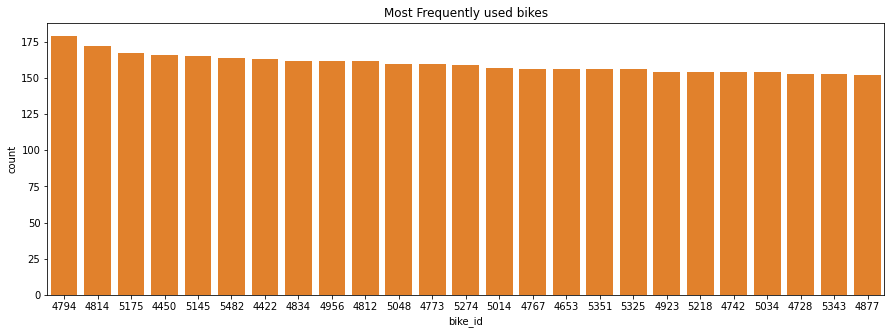

In [78]:
# most freguently used bike
color = sns.color_palette()[1]
plt.figure(figsize=(15,5))
order = bike_df['bike_id'].value_counts()[:25].index
sns.countplot(data = bike_df, x='bike_id', color=color, order = order)
plt.title('Most Frequently used bikes');

It seems most bikes have quite the same preference,although bike id '4794' is slightly above the others.I do not think members have favourites

#### Proportion of members who are customers or subscribers
There are two types of members:Customers and Subscribers. Let's see the proportions that constitutes each group

In [79]:
valuecount = bike_df['user_type'].value_counts()
valuecount

Subscriber    158196
Customer       16553
Name: user_type, dtype: int64

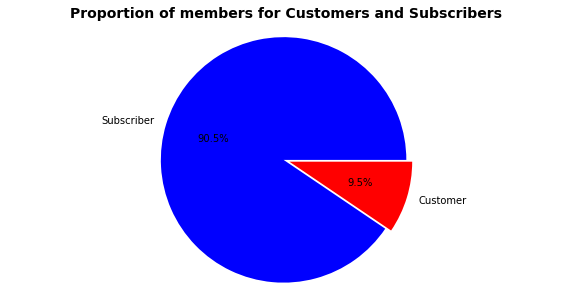

In [80]:
my_explode =(0.05,0)
plt.figure(figsize = (10,5))
my_colours = ['blue','red']
labels ='Subscriber','Customer'
plt.pie(valuecount,labels = labels,autopct='%1.1f%%', colors = my_colours,explode = my_explode)
plt.title('Proportion of members for Customers and Subscribers',fontsize = 14,weight = 'bold')
plt.axis('equal');

Subscribers make up 90.5% of members. Later, I will explore which of these groups use bike_share for all trips.

#### Proportion of members who use bike_share for all their trips 
There are members who use bike_share for all their trips and those that do not.                                               
Let's find out each group's proportion

In [81]:
counts = bike_df['bike_share_for_all_trip'].value_counts()
counts

No     157457
Yes     17292
Name: bike_share_for_all_trip, dtype: int64

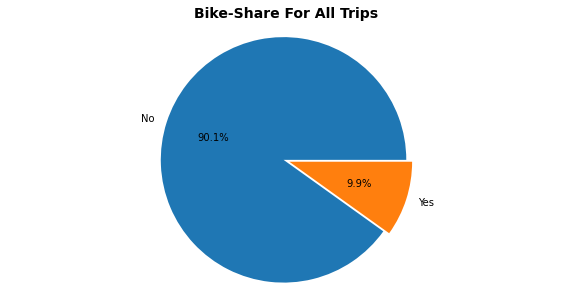

In [82]:
plt.figure(figsize = (10,5))
my_explode =(0,0.05)
labels = 'No','Yes'
plt.pie(counts,labels = labels,autopct='%1.1f%%',explode = my_explode)
plt.title('Bike-Share For All Trips',fontsize = 14,weight = 'bold')
plt.axis('equal');

90.1% of members Do Not use bike_share for all trips.

#### Stations that record the most share 
Let's see which station recorded the most bike rides

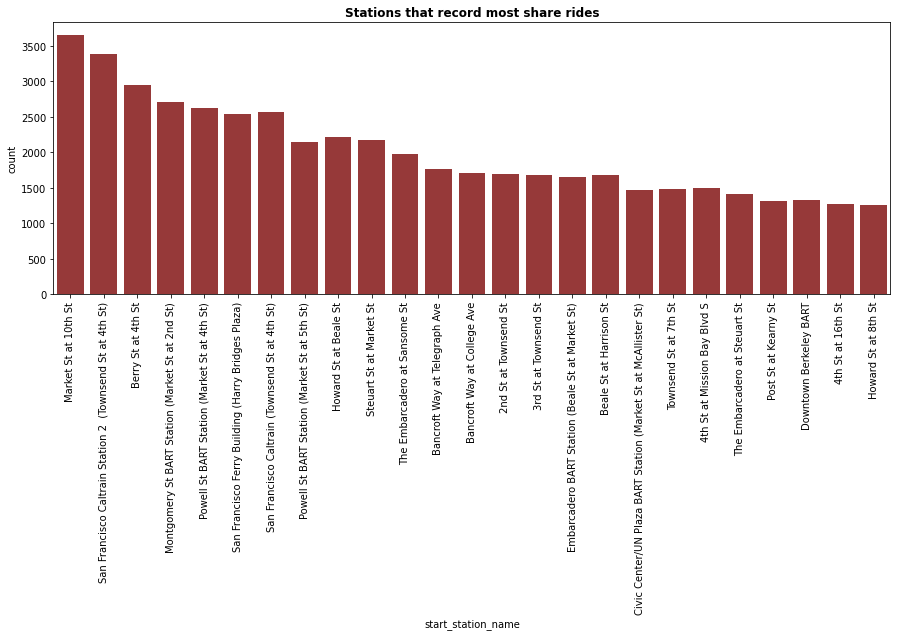

In [83]:
plt.figure(figsize=(15,5))
order = df['start_station_name'].value_counts()[:25].index
plt.xticks(rotation=90)
sns.countplot(data=bike_df, x='start_station_name', color='brown', order = order)
plt.title('Stations that record most share rides',weight = 'bold');

Members seem to start their trips at Market St at 10th St.

#### Rush hours for bike-share trips 
This histogram will show the range of time of the day that recorded the most bike rides

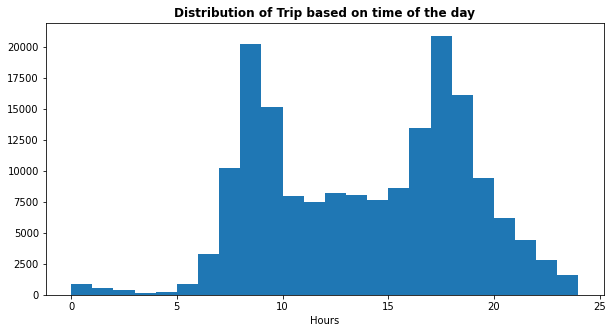

In [84]:
plt.figure(figsize = (10,5))
bins = np.arange(0,25, 1)
plt.hist(data = bike_df, x = 'start_hour', bins = bins)
plt.xlabel('Hours')
plt.title('Distribution of Trip based on time of the day',weight = 'bold');

The distribution of the hour of day is bimodal. Trips usually starts between 8-9am And between 5-6pm.

#### Days that record most trips
What day of the week recorded the the highest bike rides

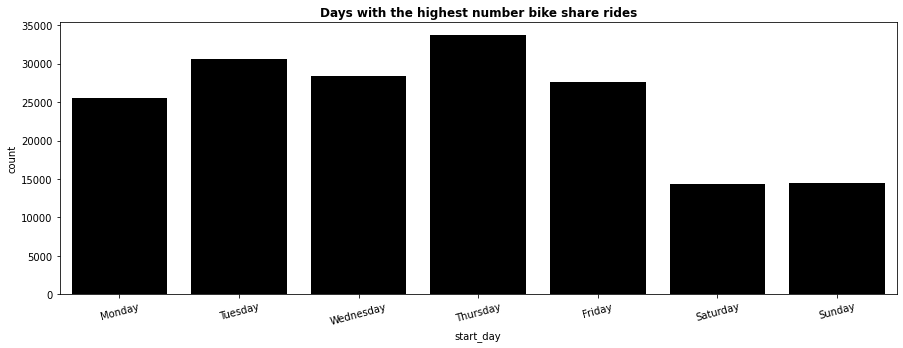

In [85]:
plt.figure(figsize=(15,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(rotation=15)
sns.countplot(data=bike_df, x='start_day',color = 'black', order = order)
plt.title('Days with the highest number bike share rides',weight = 'bold');

It seems Thursdays usually record highest count of bike-share rides.Saturdays and Sundays records the least

#### Summary of univariate exploration
You would think subscribers will make a huge portion of the members but it's rather the non_subscribers.
Interestingly,members who use bike_share for all their trips make up a large proportion of 90%.
                                                                                                                   
The ages in the member_age column had really extreme numbers.It is unusual for a 144 year old person to be alive and even in this context, be using bikes for their trips. I had to only include observations that had ages less than 80. Now the highest age is 78 years which is quite usual.

## Bivariate Exploration



#### Average trip duration for members of bike-share for all trips
Let's see the average trip time made by members who use bike-share for all trips

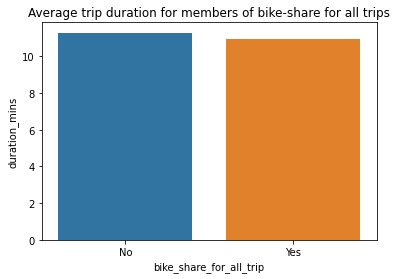

In [86]:
sns.barplot(data = bike_df, y = 'duration_mins',x = 'bike_share_for_all_trip',ci = False)
plt.title('Average trip duration for members of bike-share for all trips');

There isn't any significant mean difference between members who use bike-share for all trips and those who do not. Interestingly, there is a marginal increase for members who do not use bike-share for all trips

#### Average trip duration for each day 
What is the average trip duration covered by members on each day of the week

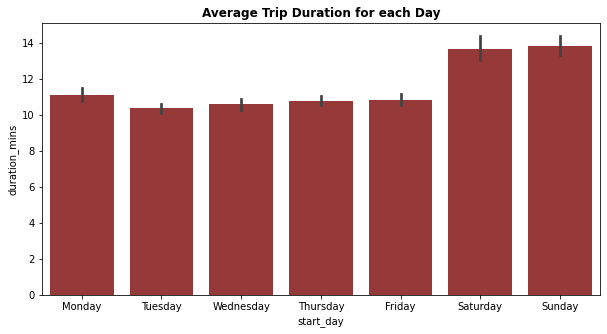

In [87]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize = (10,5))
sns.barplot(data = bike_df, y = 'duration_mins', x = 'start_day',color = 'brown' ,order = order)
plt.title('Average Trip Duration for each Day',weight = 'bold');

The error bars show  almost equally spread out data points. The weekends: Saturday and Sunday have the highest average trip duration. Members tend to have longer trip time on these days.

#### Distribution of trips covered for each gender
Let's use these boxplot and strip plot to show the relationship between trip time covered based on gender

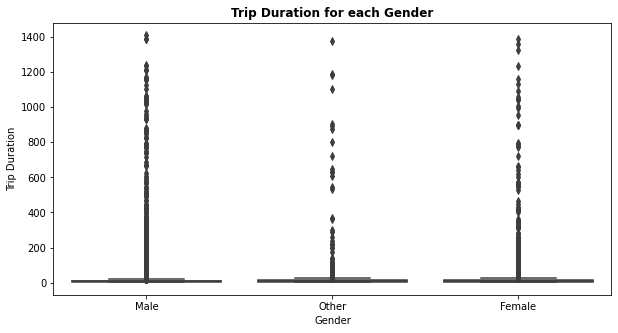

In [88]:
plt.figure(figsize = (10,5))
plot = sns.boxplot( x = 'member_gender', y = 'duration_mins',data = bike_df )
plot.set(xlabel = 'Gender',ylabel = 'Trip Duration')
plt.title('Trip Duration for each Gender',weight ='bold');

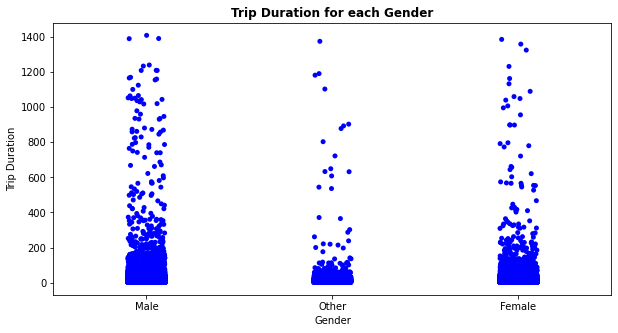

In [89]:
plt.figure(figsize = (10,5))
plot = sns.stripplot( x = 'member_gender', y = 'duration_mins',data = bike_df,color = 'blue' )
plot.set(xlabel = 'Gender',ylabel = 'Trip Duration')
plt.title('Trip Duration for each Gender',weight = 'bold');

Although all gender do some long trip time,Males do longer trip time than Females and 'other' gender. 'Other' gender do the least trip time.This is also due to their sampling distribution in the dataset

#### Number of trips during hours of the day based on user type
Which group of members based on user type go on most trips throughout the day.

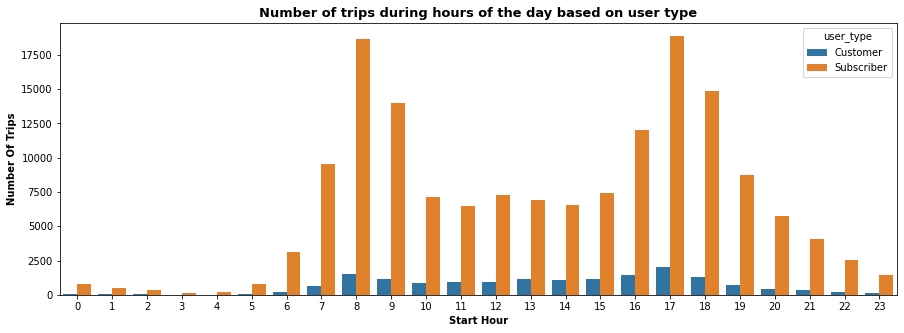

In [90]:
title = "Number of trips during hours of the day based on user type"
xlabel = "Start Hour"
ylabel = "Number of Trips"
def bicountplot(data,x,hue):
    plt.figure(figsize = (15,5))
    plot = sns.countplot(data = data, x = x, hue = hue)
    plt.title(title,fontsize = 13,weight = 'bold')
    plt.xlabel(xlabel.title(),fontsize = 10,weight = 'bold')
    plt.ylabel(ylabel.title(),fontsize = 10,weight = 'bold')
    return plot
bicountplot(bike_df, "start_hour", 'user_type');


The time of the day that recorded most number of trips is  8am and 5pm by non-subscribers(customers). I suggest, these are rush hours for members going to work and returning home respectively

#### Average trip duration for member type
What is the average rate of time covered for each user type

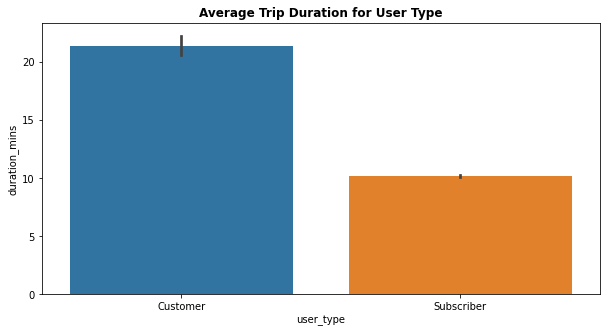

In [91]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'user_type', y = 'duration_mins', data = bike_df )
plt.title('Average Trip Duration for User Type',weight = 'bold');

Non subscribers usually do longer trip time

#### Association between user type and members who use bike-share for all trips
What number of users who use bike-share for all their trips make up each user type.

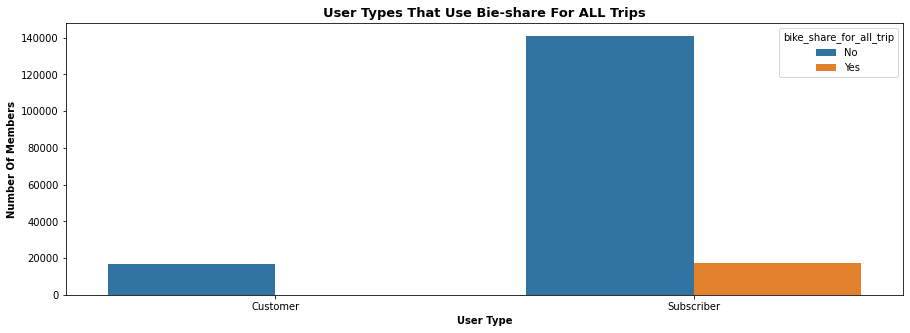

In [92]:
title = "User Types That Use Bie-share For ALL Trips"
xlabel = "User Type"
ylabel = "Number of Members"
bicountplot(bike_df,'user_type','bike_share_for_all_trip');


A big chunk of members who Do Not use bike-share for all their trips are subscribers. Both groups of members do not significantly use bike-share for all their trips.

#### Summary of Bivariate exploration
 Members who use bike-share for all trips and members who do not, have almost the same average trip time
 Subscribers and Non-subscribers mostly do not use bike-share for all trips

It was interesting that there was no relationship between age and trip duration. How long a trip last did not depend on a member's age.
Trip duration increases during weekends, but you would think members would need bike-share for busy work days.

## Multivariate Exploration



#### Trip duration during hours of the day for user type
Let's use the following bar plot and line chart to explore average time covered for both user types at each hour of the day

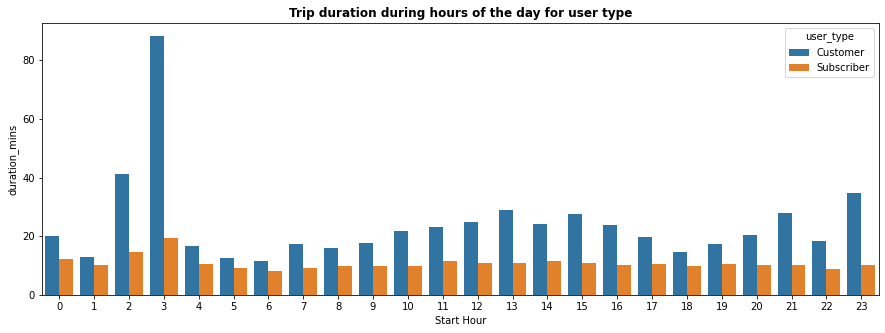

In [95]:
plt.figure(figsize = (15,5))
sns.barplot(data = bike_df, x = "start_hour", y ='duration_mins' , hue='user_type', ci = False)
plt.xlabel('Start Hour')
plt.title('Trip duration during hours of the day for user type',weight = 'bold');

Long trips are covered around 3am.Let's explore further with a line plot

In [96]:
hour = bike_df.pivot_table(index = 'start_hour', columns = 'user_type', values = 'duration_mins', aggfunc = 'mean')
hour

user_type,Customer,Subscriber
start_hour,,
0,20.142857,12.183521
1,12.727273,10.172557
2,41.194444,14.622642
3,88.272727,19.372549
4,16.647059,10.476190
5,12.477612,9.291615
6,11.505747,8.250722
7,17.179448,9.233758
8,16.099804,9.977254


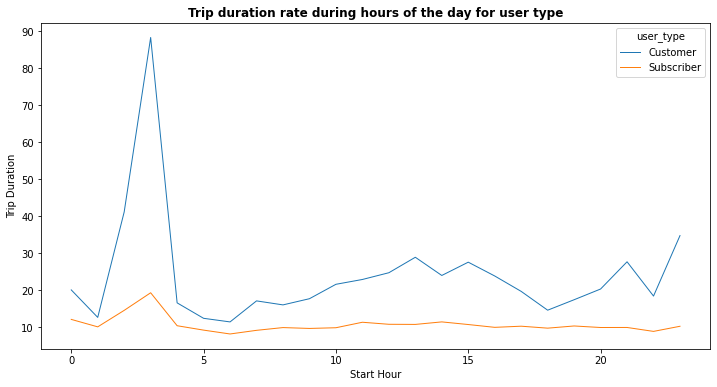

In [98]:
hour.plot(kind='line', linewidth=1.0, figsize=(12, 6))
plt.ylabel('Trip Duration')
plt.xlabel ('Start Hour')
plt.title("Trip duration rate during hours of the day for user type",weight = 'bold');

Both user types go on longer trips during the hours of 3am although customers(non-subscribers) have a significantly higher rate

#### Association between trip time, day and members who use bike-share for  all their trips
Let's find out  days on which members that use bike-share for all trips do more trip time

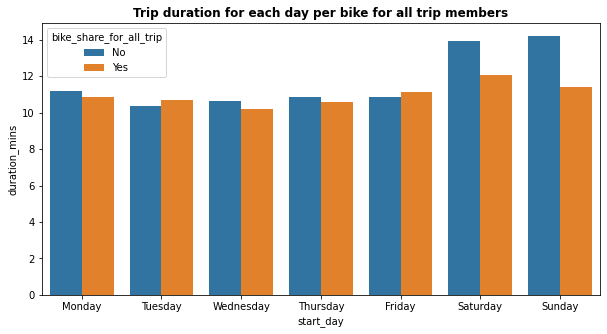

In [99]:
plt.figure(figsize = (10,5))
order = order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data = bike_df, x = "start_day", y = "duration_mins",   hue='bike_share_for_all_trip',order = order,ci = None)
plt.title("Trip duration for each day per bike for all trip members",weight = 'bold')
plt.show()

Members who do not use bike-share for all their trips  usually have longer trip duration on Saturdays and Sundays. The other days almost stays the same throughout.                                                                    
Members who use bike-share for all their trips have almost the same average trip duration throughout the week with just a marginal difference on Saturdays.

#### Association between trip duration,user-type and bike_share_for_all_trips
Let's investigate trip time covered by user types and members who use bike-share for all trips

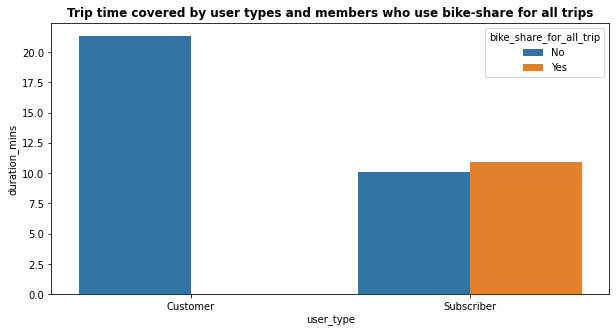

In [100]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'user_type', y = 'duration_mins', hue = 'bike_share_for_all_trip', data = bike_df, ci = None)
plt.title('Trip time covered by user types and members who use bike-share for all trips',weight = 'bold');

Non subscribers who Do Not use bike_share for all trips usually have longer trip time 

#### Association between ages, user_type and bike-share_for_all_trip
Age distribution of user types and members who use bike-share for all their trips

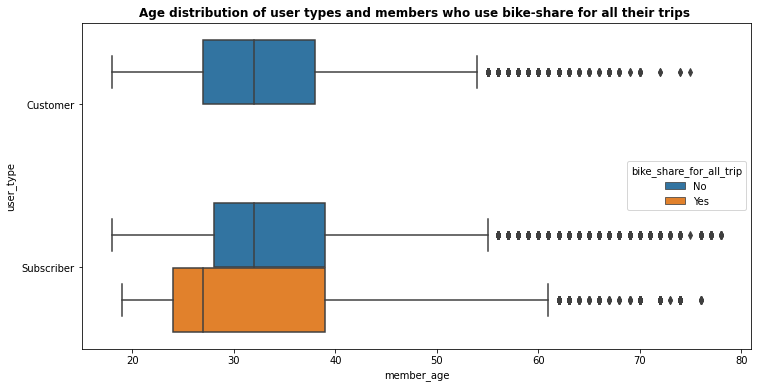

In [101]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'member_age',y = 'user_type', hue = 'bike_share_for_all_trip', data = bike_df)
plt.title('Age distribution of user types and members who use bike-share for all their trips ',weight = 'bold');

Both subscribers and customers(non subscribers) who Do Not use bike-share for all their trips have almost the same median age at about 33 years.                                                                                
The median age of subscribers who use bike-share for all trips is around 28 years.                                      


#### Trip time covered on each day of the month based on user type
This lineplot will show us the trend for average trip based on user types on each day of the month

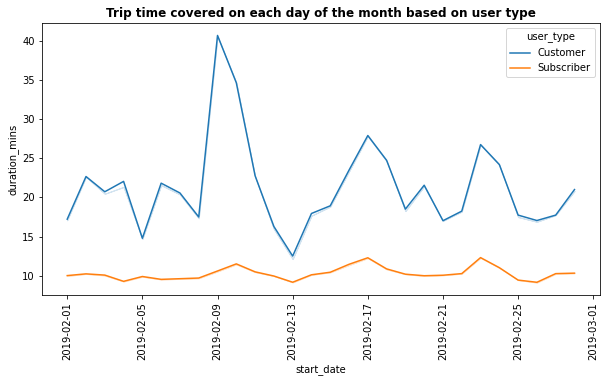

In [102]:
plt.figure(figsize= (10,5))
plt.xticks(rotation = 90)
sns.lineplot(data = bike_df, x = 'start_date', y = 'duration_mins',hue = 'user_type', ci = False)
plt.title('Trip time covered on each day of the month based on user type',weight = 'bold');

 Non subscribers go on longer trips than subscribers throughout the month. February,9th recorded the longest trip duration and the least trip duration was on February,13                                                                             
Non Subscribers had the most trip duration on February,17th and 23rd.

#### Trip time covered on each day of the month based on bike_share_for_all_trips
Let's investigate average trip time for each day of the month for members who use bike-share for all trips

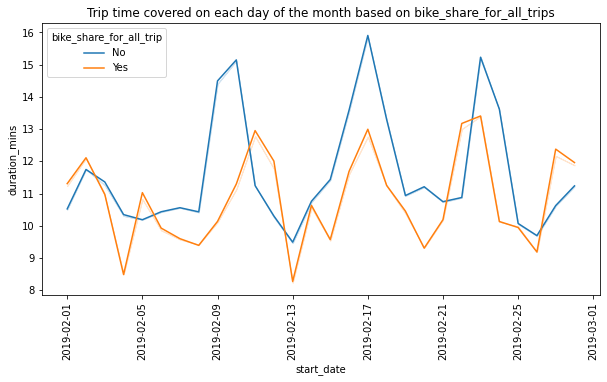

In [103]:
plt.figure(figsize= (10,5))
plt.xticks(rotation = 90)
sns.lineplot(data = bike_df, x = 'start_date', y = 'duration_mins',hue = 'bike_share_for_all_trip', estimator = 'mean',ci = False)
plt.title('Trip time covered on each day of the month based on bike_share_for_all_trips');

Members who Do Not use bike-share for all trips did longer trips than members who use bike_share for all trips throughout the month. 
February 17th, recorded highest trip duration for members who Do Not use bike-share for all trips while February 23rd was the highest for members who use bike-share for all trips
February,13th recorded the least trip duration for both groups

### Observed relationships between features of Interest and other supporting Features
                
1.Non-subscribers(customers) who Do Not use bike_share for all trips had longer trip time.                            
2.Non-subscribers(customers) have longer trip time throughout the month than subscribers.                             
                                                                            
                                                                            
3.Generally, Females also do long trips as males.                                                            .                 
4.Weekends(saturdays and sundays) recorded the least number of trips but still had the longest trip duration.                   
5.Rush hours for bike-share are 8am and 5pm by customers(non-subscribers).It is same for subscribers although they make up a smaller number



### Interesting interactions between features.

Apparently there are no customers(non-subscribers) who use bike-share for all their trips .                                 
Members patronize bike-share throughout the day. Interestingly, the longest trip duration is around 3am for both user types   
Non subscribers(customers) go on longer trips than subscribers throughout the month.                                 
Both user types(subscribers and customers) generally do not use bike-share for all trips although just small number of subscribers of about 2000 use bike-share for all trips.                                                         
Although some members do long trips, the most count of trip times falls between 5 and 10 minutes



## Conclusions
There should be programs to encourage subscribers to use more of  bike-share for their trips.                                 
Other gender should be encouraged to become members since males are more than twice the Females and even more than 'Other' gender.                                                
Data that covers a whole year need to be collected for thorough analysis.
